In [1]:
from cmath import nan
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from helpers_DF import *
import time

In [2]:
# Fields.csv
# r  |  z  |  Er | Ez
# Electric current = info[0] 
# Distance scaling to meter = multiply by info[1] 
# Electric Field (Er, Ez) scaling to V/m = multiply by info[2]
# Velocity scaling to m/s = multiply by info[3];
# Extractor voltage = info[6]; 

#EXTRACTOR_DIST = info[10]; //extractor distance
#EXTRACTOR_APETURE_DIA = info[11]; //extractor width
#EXTRACTOR_THICKNESS = info[12]; //extractor thickness


softening=1e-6
k=8.9875517923*1e9

info = np.loadtxt('E_field/info.txt')
convert_dist=info[1] 
convert_E=info[2]
convert_vel=info[3]

prob = np.loadtxt('E_field/prob.txt')
ri = np.loadtxt('E_field/r.txt')*convert_dist  # r initial condition in (m)
zi = np.loadtxt('E_field/z.txt')*convert_dist  # z initial condition in (m)
vri = np.loadtxt('E_field/v_r.txt')*convert_vel # vr initial condition (m/s)
vzi = np.loadtxt('E_field/v_z.txt')*convert_vel # vz initial condition (m/s)

# Load the csv file
df = pd.read_csv('E_field/Fields.csv')
# Convert the DataFrame to a numpy array
Field = df.values
r=Field[:,0]*convert_dist # r grid of the electric field (m)
z=Field[:,1]*convert_dist # z grid of the electric field (m)
Er=Field[:,2]*convert_E # Radial Electric Field Er in (V/m)
Ez=Field[:,3]*convert_E # Axial Electric Field Ez in (V/m)

interp=triangulation (r,z,Er,Ez)
dt=5e-12
Pneut=0
Pmono=40
Pdim=40
Ptrim=20


N_values=np.arange(1000,10001,1000)



In [13]:
set_num_threads(1)
times1 = []
for N in N_values:
    start_time = time.time()
    species, pos_save,IC,counters = DF_nbody(dt,N,prob,ri,zi,vri,vzi,Pneut,Pmono,Pdim,Ptrim,softening,k,interp)
    end_time = time.time()
    elapsed_time = end_time - start_time
    times1.append(elapsed_time)
    print(f"Elapsed time for N={N}: {elapsed_time} seconds")

Elapsed time for N=1000: 1.6303164958953857 seconds
Elapsed time for N=2000: 2.969590187072754 seconds
Elapsed time for N=3000: 7.68564772605896 seconds
Elapsed time for N=4000: 13.765251874923706 seconds
Elapsed time for N=5000: 20.11947226524353 seconds
Elapsed time for N=6000: 28.4707088470459 seconds
Elapsed time for N=7000: 36.78933835029602 seconds
Elapsed time for N=8000: 44.57703995704651 seconds
Elapsed time for N=9000: 53.451358795166016 seconds
Elapsed time for N=10000: 63.086206674575806 seconds


In [5]:
set_num_threads(2)
times2 = []
for N in N_values:
    start_time = time.time()
    species, pos_save,IC,counters = DF_nbody(dt,N,prob,ri,zi,vri,vzi,Pneut,Pmono,Pdim,Ptrim,softening,k,interp)
    end_time = time.time()
    elapsed_time = end_time - start_time
    times2.append(elapsed_time)
    print(f"Elapsed time for N={N}: {elapsed_time} seconds")

Elapsed time for N=1000: 1.55690336227417 seconds
Elapsed time for N=2000: 2.6593761444091797 seconds
Elapsed time for N=3000: 7.007801294326782 seconds
Elapsed time for N=4000: 12.64934754371643 seconds
Elapsed time for N=5000: 18.64410710334778 seconds
Elapsed time for N=6000: 26.50216293334961 seconds
Elapsed time for N=7000: 34.606966733932495 seconds
Elapsed time for N=8000: 41.77938652038574 seconds
Elapsed time for N=9000: 50.36539435386658 seconds
Elapsed time for N=10000: 59.39676332473755 seconds


In [4]:
set_num_threads(4)
times4 = []
for N in N_values:
    start_time = time.time()
    species, pos_save,IC,counters = DF_nbody(dt,N,prob,ri,zi,vri,vzi,Pneut,Pmono,Pdim,Ptrim,softening,k,interp)
    end_time = time.time()
    elapsed_time = end_time - start_time
    times4.append(elapsed_time)
    print(f"Elapsed time for N={N}: {elapsed_time} seconds")

Elapsed time for N=1000: 1.59769606590271 seconds
Elapsed time for N=2000: 2.733510971069336 seconds
Elapsed time for N=3000: 7.223837852478027 seconds
Elapsed time for N=4000: 13.138489723205566 seconds
Elapsed time for N=5000: 19.36033535003662 seconds
Elapsed time for N=6000: 27.643356800079346 seconds
Elapsed time for N=7000: 35.88935089111328 seconds
Elapsed time for N=8000: 43.55225086212158 seconds
Elapsed time for N=9000: 52.25453042984009 seconds
Elapsed time for N=10000: 61.93298888206482 seconds


In [3]:
set_num_threads(8)
times8 = []
for N in N_values:
    start_time = time.time()
    species, pos_save,IC,counters = DF_nbody(dt,N,prob,ri,zi,vri,vzi,Pneut,Pmono,Pdim,Ptrim,softening,k,interp)
    end_time = time.time()
    elapsed_time = end_time - start_time
    times8.append(elapsed_time)
    print(f"Elapsed time for N={N}: {elapsed_time} seconds")

Elapsed time for N=1000: 1.5695717334747314 seconds
Elapsed time for N=2000: 2.741208553314209 seconds
Elapsed time for N=3000: 7.234661340713501 seconds
Elapsed time for N=4000: 13.142115354537964 seconds
Elapsed time for N=5000: 19.358454942703247 seconds
Elapsed time for N=6000: 27.636249542236328 seconds
Elapsed time for N=7000: 35.925108909606934 seconds
Elapsed time for N=8000: 43.559900760650635 seconds
Elapsed time for N=9000: 52.296040773391724 seconds
Elapsed time for N=10000: 61.965885639190674 seconds


In [11]:
# Save the lists into a single .npz file
# np.savez('times_data.npz', times1=times1, times2=times2, times4=times4, times8=times8)
# data = np.load('times_data.npz')
# times1 = data['times1']
# times2 = data['times2']
# times4 = data['times4']
# times8 = data['times8']

Text(0, 0.5, 'Time (s)')

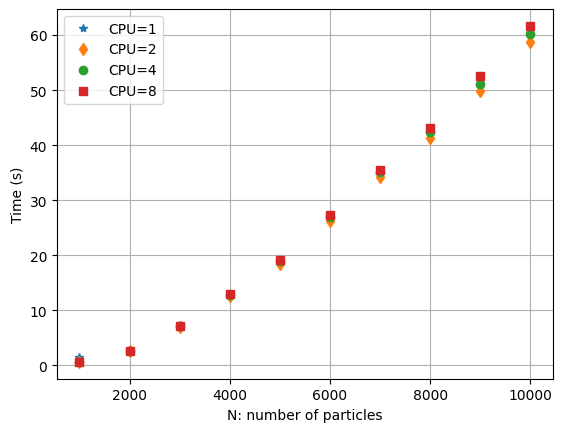

In [20]:
plt.plot(N_values,times1,'*',label='CPU=1')
plt.plot(N_values,times2,'d',label='CPU=2')
plt.plot(N_values,times4,'o',label='CPU=4')
plt.plot(N_values,times8,'s',label='CPU=8')
plt.legend()
plt.grid(True)
plt.xlabel("N: number of particles")
plt.ylabel("Time (s)")